In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

Part 1, Question 1 and Part 1, Question 2 was shown in handwritten picture in github

Part 1, Question 3

In [2]:
# activation funcition for hidden layer 
def relu(z):
  return np.where(z>0,z,0)

In [3]:
# activation function for the output layer
def sigmoid(z):
  return 1/ (1+np.exp(np.array(-z)))

In [4]:
# tranformation for a single layer of a neural network
def nn_layer(X, W, b,f):

    return f(np.dot(X, W) + b)

In [5]:
# a two_layer model
def ff_nn_Relu(X, W_1, b_1,  W_2, b_2):
  H = nn_layer(X, W_1, b_1,relu)
  Y = nn_layer(H, W_2, b_2,sigmoid)
  return Y

In [6]:
X = [[1, -1],
     [0, -1],
     [0, 1]]

W_1 = [[1, -1, 0, 1],
     [0, 0, 0.5, 1]]

b_1 = [0, 0, 1, 0]

W_2 = [1, 0, -1, 1]

b_2 = 1

Y_hat= ff_nn_Relu(X, W_1, b_1, W_2, b_2)

print(Y_hat)

[0.81757448 0.62245933 0.62245933]


Answer: 
The prediction of the input is class [1, 1, 1]

Part 2, Question 1

In [7]:
from sympy import symbols, diff
x, y, z = symbols('x y z', real=True)
f = (3-x**3) + 50*(2*y**2-x)**2

In [8]:
df_dx = diff(f, x)
print(df_dx)

-3*x**2 + 100*x - 200*y**2


In [9]:
df_dy = diff(f, y)
print(df_dy)

400*y*(-x + 2*y**2)


Part 2, Question 2

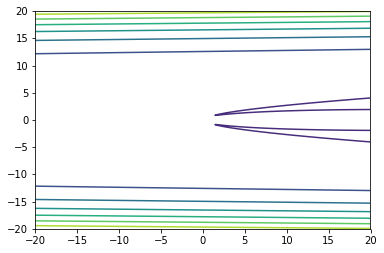

In [10]:
delta = 0.05
x = np.arange(-20.0, 20.0, delta)
y = np.arange(-20.0, 20.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*(2*Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

Part 2, Question 3

In [11]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 + 100*x - 200*y**2
    df_dy = 400*y*(-x + 2*y**2)
    return np.array([df_dx, df_dy])

In [12]:
def grad_descent(starting_point=None, iterations=50, learning_rate=0.01):
  if starting_point is None:
    point = np.random.uniform(-10, 10, size = 2)
  else: 
    point = starting_point
  trajectory = [point]

  for i in range (iterations):
    grad = grad_f(point)
    point = point - learning_rate * grad
    trajectory.append(point)

  return np.array(trajectory)
  

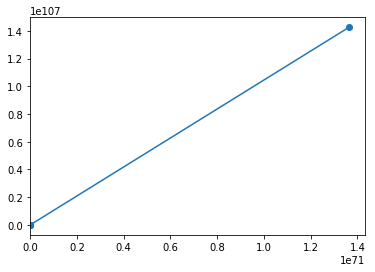

In [13]:
np.random.seed(5)
traj = grad_descent(iterations=50, learning_rate=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

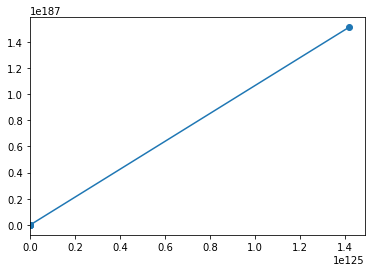

In [14]:
np.random.seed(5)
traj = grad_descent(iterations=50, learning_rate=1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

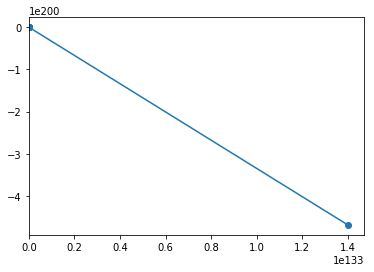

In [15]:
# learning_rate=0.001
np.random.seed(5)
traj = grad_descent(iterations=50, learning_rate=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

Answer: Changing the learning rate, y value range changed as the graph showed

Part 2, Question 4

In [16]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
  if starting_point is None:
      point = np.random.uniform(-10,10,size=2)
  else:
      point= starting_point

  outcome=[point]
  veracity = np.zeros(point.size)


  for i in range(iterations):
    grad= grad_f(point)
    veracity= alpha *veracity + grad*epsilon
    point= point-veracity
    outcome.append(point)

  return np.array(outcome)

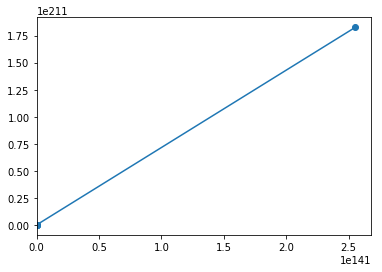

In [17]:
np.random.seed(5)
traj = grad_descent_with_momentum(iterations=100, epsilon=4, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

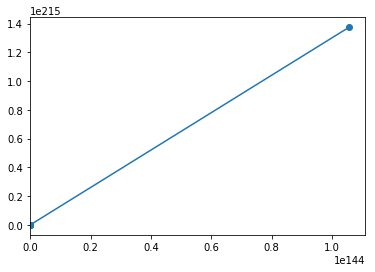

In [18]:
# change epsilon
np.random.seed(5)
traj = grad_descent_with_momentum(iterations=100, epsilon=5, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

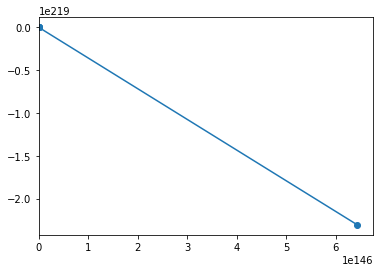

In [19]:
#change alpha
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100, epsilon=4, alpha=.25)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

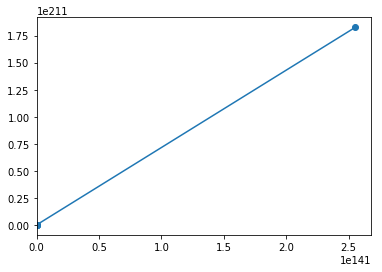

In [20]:
#change iterations
np.random.seed(5)
traj = grad_descent_with_momentum(iterations=50, epsilon=4, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

Answer: When alpha changes, the y value changes, but if change iteration and epsilon, result remains similar

Part 3, Question 1 was shown in handwritten picture in github

Part 3, Question 2

In [46]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, param_vec):
    # returns model prediction 
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24,  b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11,w_12,w_13,w_14],[w_21,w_22,w_23,w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def bxr(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))


In [47]:
def grad_f(param_vec, x, y):
    
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24,  b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11,w_12,w_13,w_14],[w_21,w_22,w_23,w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    
    # forward pass
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    # backward pass
    dldc = bxr(y, y_hat).dot( y_hat*(1-y_hat) )
    
    dldv = (bxr(y, y_hat) * y_hat*(1-y_hat)).T.dot(h)
    
    dldb = (bxr(y, y_hat) * y_hat*(1-y_hat)).T.dot(relu_derivative(a))*v
  
    dldw = x.T.dot(np.expand_dims((bxr(y, y_hat) * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
             
    
    return np.array([dldw[0,0], dldw[0,1], dldw[0,2],dldw[0,3],
                     dldw[1,0], dldw[1,1], dldw[1,2], dldw[1,3],
                     dldb[0], dldb[1], dldb[2], dldb[3],
                     dldv[0], dldv[1], dldv[2], dldv[3],
                     dldc ]) / len(y)

##Part 3, Question 3

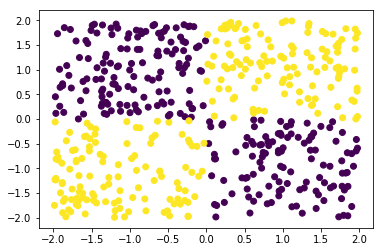

In [48]:
def binary_classification_data(N):
  x = np.random.uniform(low=-2, high=2, size=(N, 2))
  y = (x[:, 0] * x[:, 1] > 0).astype(np.int)
  return x, y

x, y = binary_classification_data(500)
plt.scatter(x[:,0],x[:,1],c=y)

##Part 3, Question 4

In [64]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.randint(-2,2,size=17)

    trajectory = [point]
    losses = [loss(y, yhat(x, point))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, point)))
    return (np.array(trajectory), losses)

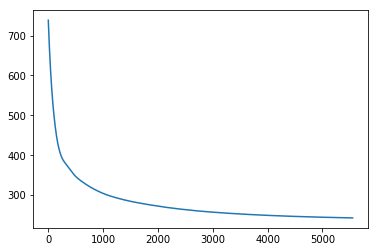

In [65]:
np.random.seed(5)
traj, losses = grad_descent(x, y, iterations=5550,learning_rate=1e-2)
plt.plot(losses)

##Part 3, Question 5

In [82]:
def grad_descent_with_momentum(x,y, iterations=50, epsilon=1, alpha=.5):
    point = np.random.randint(-1,1,size=17)
    trajectory = [point]
    losses = [loss(y, yhat(x, point))]
    v = np.zeros(len(point))        
    for i in range(iterations):
        grad = grad_f(point,x,y)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, point)))
    return (np.array(trajectory), losses)

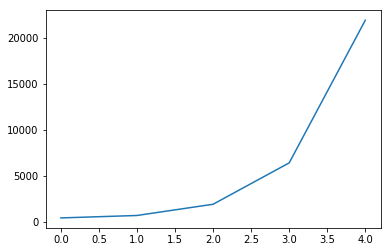

In [83]:
traj, losses = grad_descent_with_momentum(x, y, iterations=50,epsilon=2, alpha=.5)
plt.plot(losses)

##Part 3, Question 6

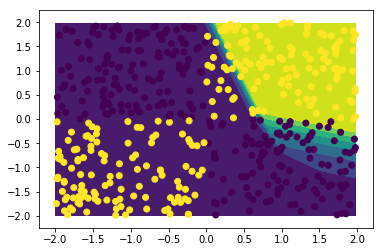

In [85]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, traj[3]).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)